In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('C:/Users/Patron/Desktop/study/fin 850/SupplyData.csv')

In [ ]:
# Convert Date column to datetime type
data['Date'] = pd.to_datetime(data['Date'])

# Sort data by Date
data = data.sort_values('Date')

# Feature Selection (Supply is the target variable)
features = ['72 Day Temperature', '72 Day Precipitation']

target = 'Supply'

In [4]:
# Remove commas and convert to float
data['Supply'] = data['Supply'].str.replace(',', '').astype(float)


In [5]:
# Create the target variable (y)
y = data[target].astype(float)

# Split data into training and testing sets (80% train, 20% test)
train_size = int(0.8 * len(y))
y_train, y_test = y[:train_size], y[train_size:]

# Fit the ETS model with multiplicative seasonality and trend
model = ExponentialSmoothing(y_train, trend='mul', seasonal='mul', seasonal_periods=72)
model_fit = model.fit()

# Make predictions
predictions = model_fit.forecast(len(y_test))


C:\Users\Patron\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\holtwinters\model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


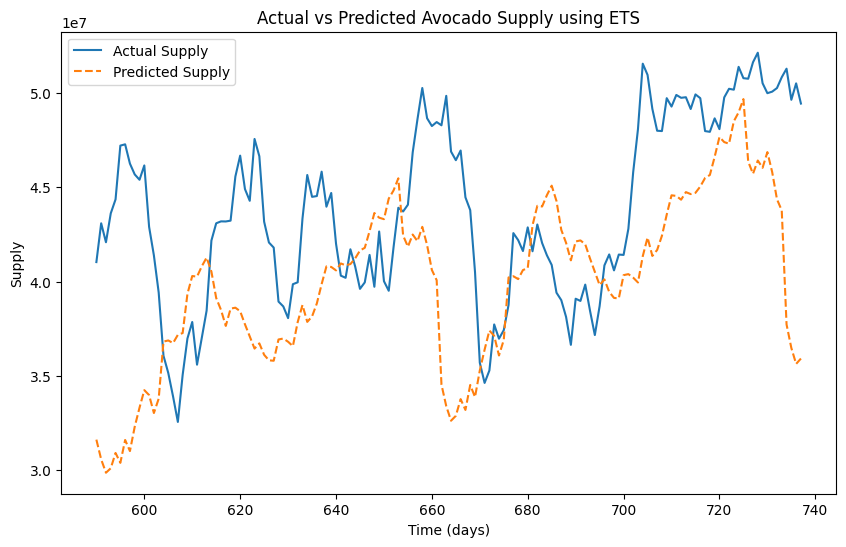

In [6]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual Supply')
plt.plot(y_test.index, predictions, label='Predicted Supply', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Supply')
plt.title('Actual vs Predicted Avocado Supply using ETS')
plt.legend()
plt.show()

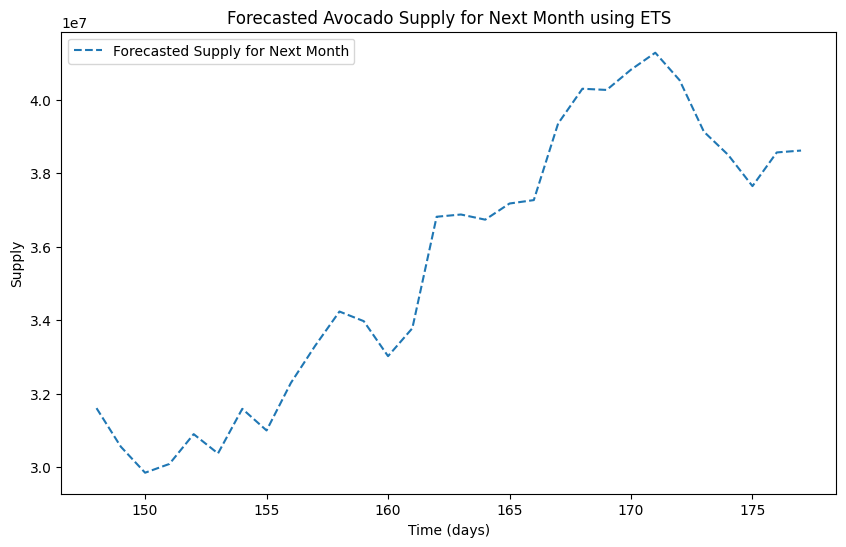

In [7]:
# Forecasting for the next month (assuming 30 days forecast)
forecast = model_fit.forecast(30)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(range(len(y_test), len(y_test) + 30), forecast, label='Forecasted Supply for Next Month', linestyle='--')
plt.xlabel('Time (days)')
plt.ylabel('Supply')
plt.title('Forecasted Avocado Supply for Next Month using ETS')
plt.legend()
plt.show()